In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_years_dfs(input_path: str):
    excel_file = pd.ExcelFile(input_path)
    
    for year in excel_file.sheet_names:
        df = pd.read_excel(excel_file, sheet_name=year)
        df["proportion"] = df["count"] / df["count"].sum()
        yield df

def get_full_df(input_path: str):
    return pd.concat(get_years_dfs(input_path))

In [3]:
def get_ranked_proportion_df(df: pd.DataFrame):
    return  df\
            .groupby("entity")["proportion"]\
            .sum()\
            .reset_index()\
            .sort_values(
                by="proportion", 
                ascending=False
            )

In [4]:
def get_entity_proportion_in_year(df: pd.DataFrame, year: str, entity: str):
    matches = df[(df["year"] == year) & (df["entity"] == entity)]
    
    if matches.shape[0] == 0:
        return 0
    
    return matches["proportion"].iloc[0]

In [5]:
NUM_ENTITIES = 5
years = range(2009, 2025)

def plot_and_save_entities_plot(input_path: str, title_template: str, save_path: str):
    full_df = get_full_df(input_path)
    
    ranked_prop_df = get_ranked_proportion_df(full_df)

    top_entities = ranked_prop_df["entity"].head(NUM_ENTITIES)
    
    plt.figure(figsize=(12, 6))

    for entity in top_entities:
        data = [
                get_entity_proportion_in_year(full_df, year, entity)
                for year in years
        ]

        plt.plot(years, data, marker="o")

    plt.xticks(list(years), rotation=45)
    
    plt.legend(top_entities)

    plt.title(title_template.replace("NUM_ENTITIES", str(NUM_ENTITIES)))
    plt.xlabel("year")
    plt.ylabel("proportion of total entity counts")

    plt.savefig(save_path)

    plt.show()

### Generate line plots for entities in body text

All text types

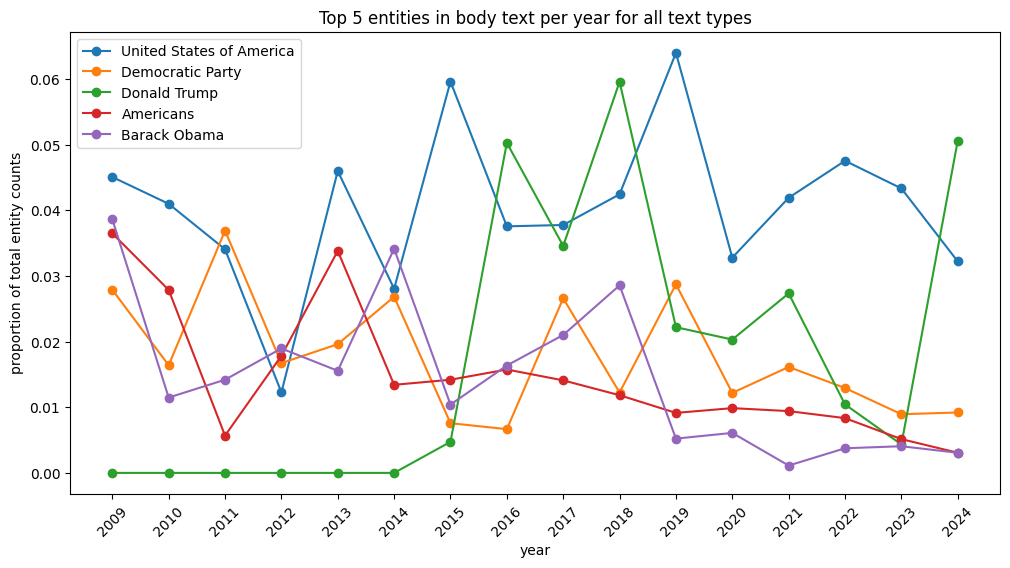

In [6]:
plot_and_save_entities_plot(
    input_path="./output/ner.xlsx",
    title_template="Top NUM_ENTITIES entities in body text per year for all text types",
    save_path="./visualization/NER/plots_over_time/all_types.png"
)

News and blog

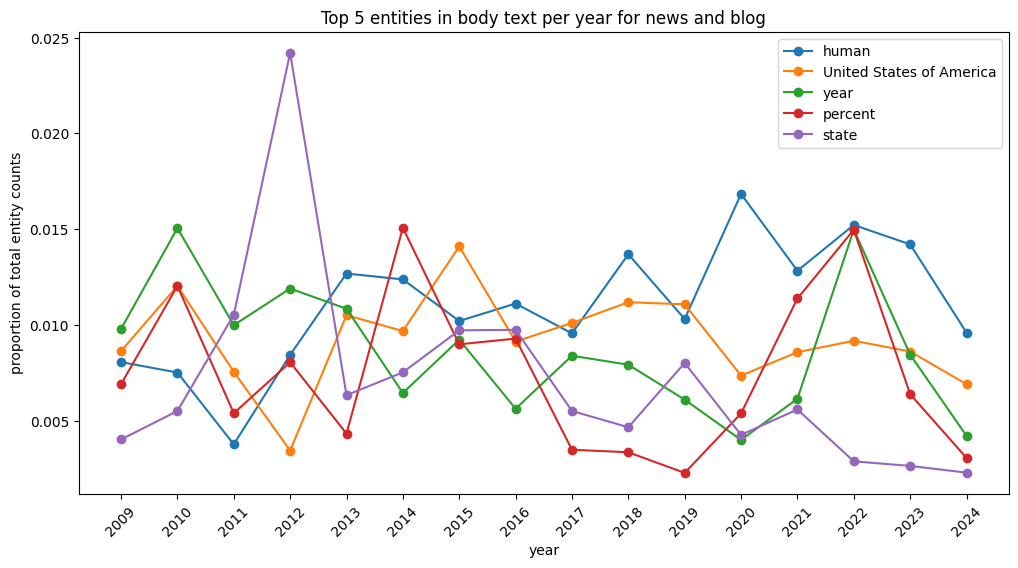

In [7]:
plot_and_save_entities_plot(
    input_path="./output/news_and_blog/ner_news_and_blog.xlsx",
    title_template="Top NUM_ENTITIES entities in body text per year for news and blog",
    save_path="./visualization/NER/plots_over_time/news_and_blog.png"
)

Press release

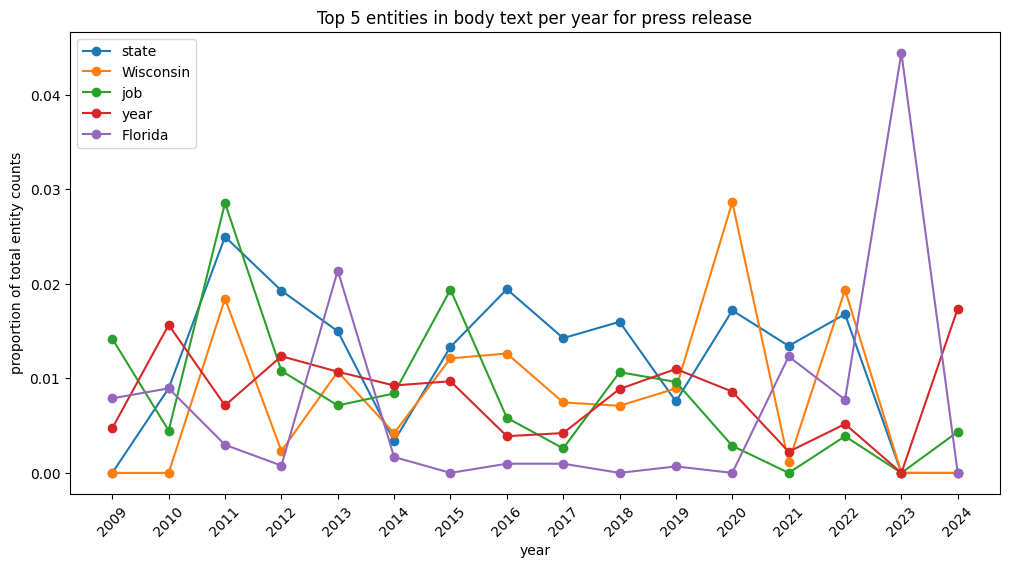

In [8]:
plot_and_save_entities_plot(
    input_path="./output/press_release/ner_press_release.xlsx",
    title_template="Top NUM_ENTITIES entities in body text per year for press release",
    save_path="./visualization/NER/plots_over_time/press_release.png"
)

Social media

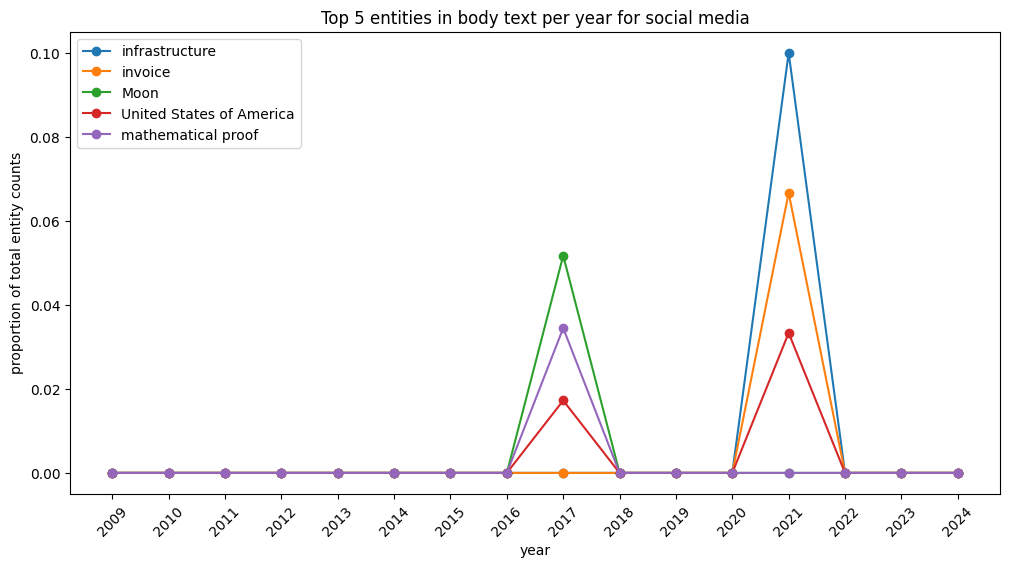

In [9]:
plot_and_save_entities_plot(
    input_path="./output/social_media/ner_social_media.xlsx",
    title_template="Top NUM_ENTITIES entities in body text per year for social media",
    save_path="./visualization/NER/plots_over_time/social_media.png"
)

### Generate line plots for entities in headline text

All text types

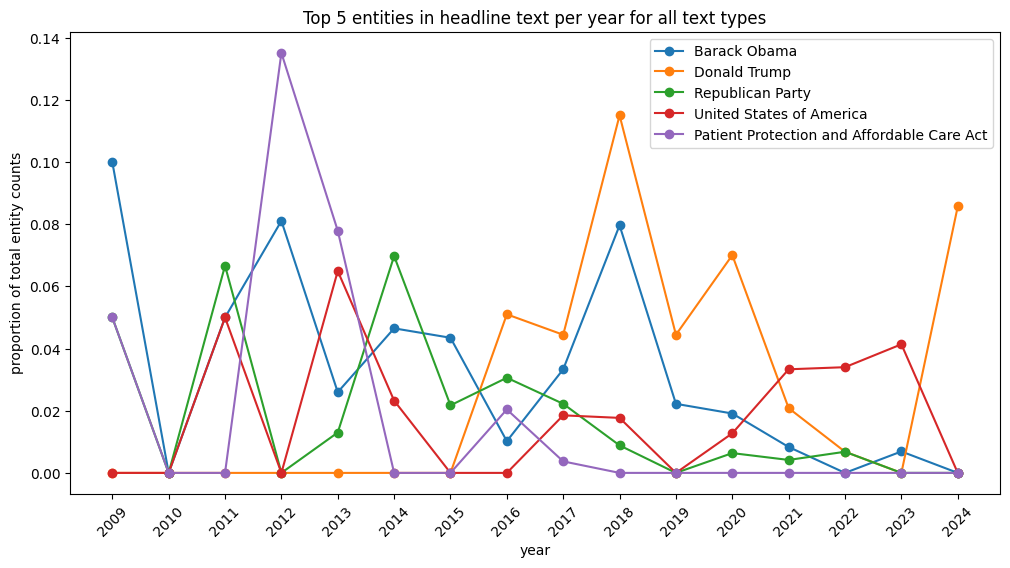

In [10]:
plot_and_save_entities_plot(
    input_path="./output/ner_headlines.xlsx",
    title_template="Top NUM_ENTITIES entities in headline text per year for all text types",
    save_path="./visualization/NER/plots_over_time/all_types_headlines.png"
)

News and blog

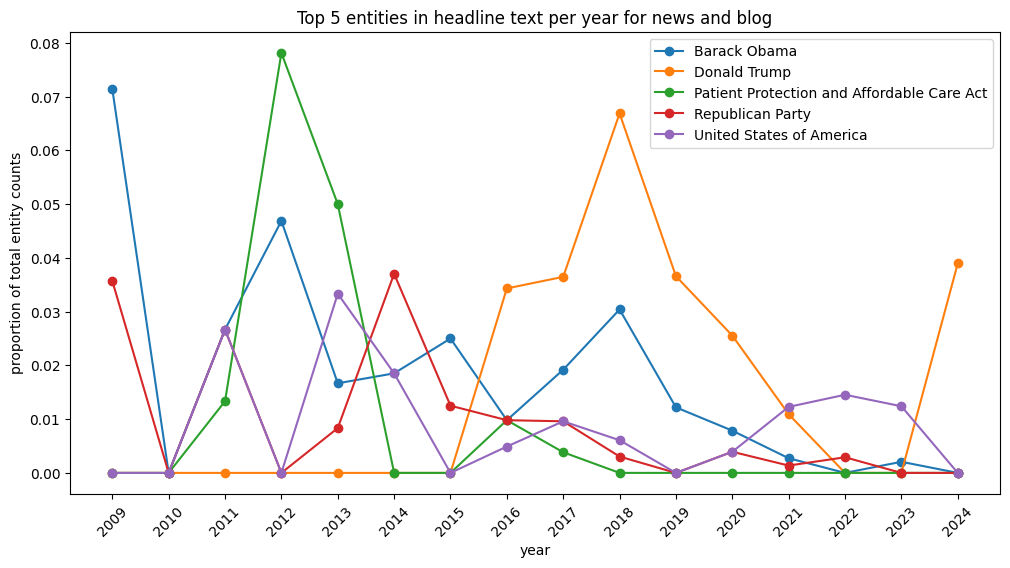

In [11]:
plot_and_save_entities_plot(
    input_path="./output/news_and_blog/ner_news_and_blog_headlines.xlsx",
    title_template="Top NUM_ENTITIES entities in headline text per year for news and blog",
    save_path="./visualization/NER/plots_over_time/news_and_blog_headlines.png"
)

Press release

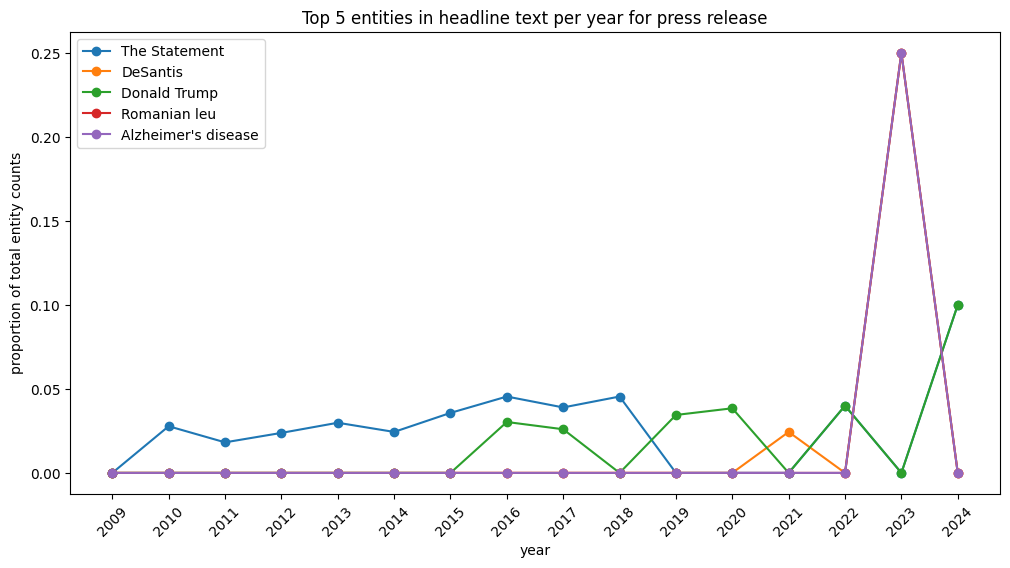

In [12]:
plot_and_save_entities_plot(
    input_path="./output/press_release/ner_press_release_headlines.xlsx",
    title_template="Top NUM_ENTITIES entities in headline text per year for press release",
    save_path="./visualization/NER/plots_over_time/press_release_headlines.png"
)

Social media (not very interesting because almost all social media articles don't have headlines)

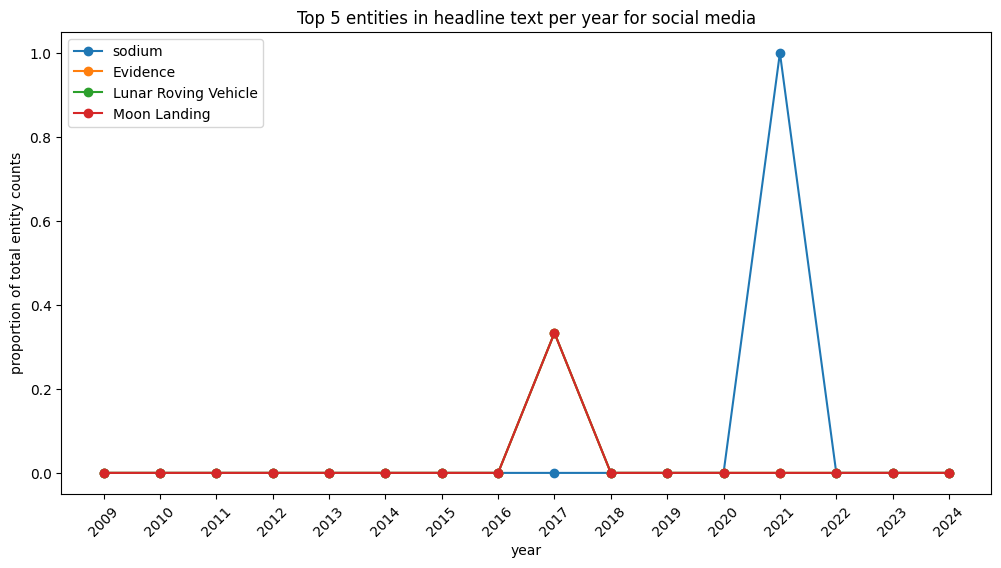

In [13]:
plot_and_save_entities_plot(
    input_path="./output/social_media/ner_social_media_headlines.xlsx",
    title_template="Top NUM_ENTITIES entities in headline text per year for social media",
    save_path="./visualization/NER/plots_over_time/social_media_headlines.png"
)